# Demo: Exploring Time Series Data

In [9]:
# Initial imports
import pandas as pd
import hvplot.pandas
import numpy as np
from path import Path

## Loading Time Series Data Into a DataFrame

In [10]:
# Set the file path
file_path = Path("../Resources/national-home-sales.csv")

In [11]:
# Load time series data into Pandas
df_home_sales = pd.read_csv(file_path, index_col = 'period_end_date', parse_dates=True)

In [12]:
# Display sample data
df_home_sales.head(10)

,inventory,homes_sold,median_sale_price
period_end_date,,,
2020-01-01,1250798,377964,289000
2020-02-01,1265253,405992,294000
2020-03-01,1316823,507324,303000
2020-04-01,1297460,436855,304000
2020-05-01,1289500,421351,299000
2020-06-01,1219863,587635,310000
2020-07-01,1165359,700733,323000
2020-08-01,1066903,652878,328000
2012-02-01,2078931,304737,160000


In [13]:
# Sort the DataFrame index in ascending order
df_home_sales = df_home_sales.sort_index()

# Display sample data
df_home_sales

,inventory,homes_sold,median_sale_price
period_end_date,,,
2012-02-01,2078931,304737,160000
2012-03-01,2120173,394034,171000
2012-04-01,2155803,404927,178000
2012-05-01,2163303,464281,186000
2012-06-01,2145658,487959,194000
...,...,...,...
2020-04-01,1297460,436855,304000
2020-05-01,1289500,421351,299000
2020-06-01,1219863,587635,310000


## Identifying Seasonal Patterns

<AxesSubplot:xlabel='inventory'>

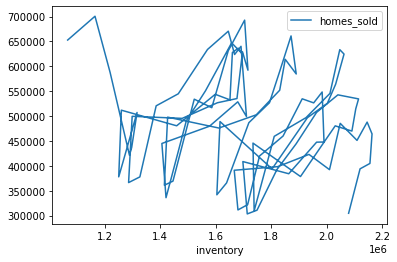

In [14]:
# Plot the inventory and homes_sold series
df_home_sales.plot(x='inventory', y='homes_sold')

In [15]:
# Select homes sold in 2014 using the year
sales_2014 = df_home_sales["homes_sold"].loc["2014"]

# Display 2014 home sales data
print(sales_2014)

period_end_date
2014-01-01    303454
2014-02-01    310918
2014-03-01    392509
2014-04-01    444227
2014-05-01    507516
2014-06-01    542753
2014-07-01    534616
2014-08-01    514686
2014-09-01    469975
2014-10-01    480451
2014-11-01    378599
2014-12-01    445766
Name: homes_sold, dtype: int64


<AxesSubplot:title={'center':'Homes Sold in 2014'}, xlabel='period_end_date'>

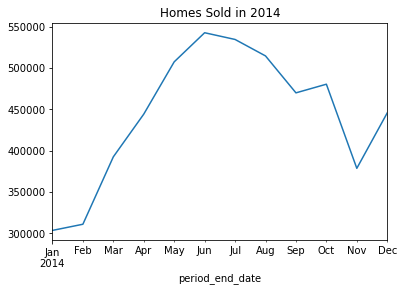

In [16]:
# Plot 2014 home sales data
sales_2014.plot(title="Homes Sold in 2014")

In [28]:
# Compute the total home sales per quarter
quarterly_sales = df_home_sales['homes_sold'].groupby(by=[df_home_sales.index.quarter]).sum()


In [29]:
# Display total home sales per quarter
quarterly_sales

period_end_date
1    10081561
2    14788243
3    14518462
4    11126303
Name: homes_sold, dtype: int64

<AxesSubplot:xlabel='period_end_date'>

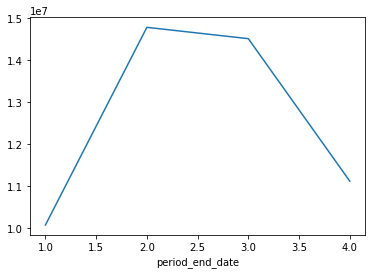

In [19]:
# Plot total home sales per quarter
quarterly_sales.plot()

In [20]:
# Compute total quarterly home sales per year
quarterly_sales_per_year = df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.year, df_home_sales.index.quarter]).sum()

In [21]:
# Display total quarterly home sales per year
quarterly_sales_per_year

period_end_date  period_end_date
2012             1                   698771
                 2                  1357167
                 3                  1329120
                 4                  1212750
2013             1                  1053470
                 2                  1521401
                 3                  1533894
                 4                  1240531
2014             1                  1006881
                 2                  1494496
                 3                  1519277
                 4                  1304816
2015             1                  1105378
                 2                  1676173
                 3                  1714455
                 4                  1379792
2016             1                  1194478
                 2                  1779674
                 3                  1750930
                 4                  1476636
2017             1                  1264554
                 2                  1841266

<AxesSubplot:xlabel='period_end_date,period_end_date'>

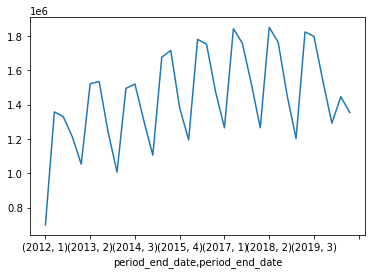

In [22]:
# Plot total quarterly home sales per year
quarterly_sales_per_year.plot()

In [23]:
quarterly_sales_per_year.index

MultiIndex([(2012, 1),
            (2012, 2),
            (2012, 3),
            (2012, 4),
            (2013, 1),
            (2013, 2),
            (2013, 3),
            (2013, 4),
            (2014, 1),
            (2014, 2),
            (2014, 3),
            (2014, 4),
            (2015, 1),
            (2015, 2),
            (2015, 3),
            (2015, 4),
            (2016, 1),
            (2016, 2),
            (2016, 3),
            (2016, 4),
            (2017, 1),
            (2017, 2),
            (2017, 3),
            (2017, 4),
            (2018, 1),
            (2018, 2),
            (2018, 3),
            (2018, 4),
            (2019, 1),
            (2019, 2),
            (2019, 3),
            (2019, 4),
            (2020, 1),
            (2020, 2),
            (2020, 3)],
           names=['period_end_date', 'period_end_date'])

In [24]:
# Plot quarterly home sales per year using a heatmap
df_home_sales.hvplot.heatmap(
    x="index.year",                     
    y="index.quarter", 
    C="homes_sold", 
    cmap="blues"
).aggregate(function=np.mean)

:HeatMap   [index.year,index.quarter]   (homes_sold)